In [67]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

C:\Users\Benny Boi\AppData\Local\Temp\ipykernel_12852\3737528325.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [34]:
pd.options.display.max_columns = 500

# Time Series - Kaggle Course

Forecasting is perhaps the most common application of machine learning in the real world. Businesses forecast product demand, governments forecast economic and population growth, meteorologists forecast the weather. The understanding of things to come is a pressing need across science, government, and industry (not to mention our personal lives!), and practitioners in these fields are increasingly applying machine learning to address this need.

Time series forecasting is a broad field with a long history. This course focuses on the application of modern machine learning methods to time series data with the goal of producing the most accurate predictions. The lessons in this course were inspired by winning solutions from past Kaggle forecasting competitions but will be applicable whenever accurate forecasts are a priority.

<b><br>After finishing this course, you'll know how to:</b></br>

    -engineer features to model the major time series components (trends, seasons, and cycles),
    -visualize time series with many kinds of time series plots,
    -create forecasting hybrids that combine the strengths of complementary models, and
    -adapt machine learning methods to a variety of forecasting tasks.

https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial

## Importing data

In [35]:
train = pd.read_csv(r"C:\Users\Benny Boi\Repositories\Medoci\data\kaggle\tutorials\time_series\train.csv")
test = pd.read_csv(r"C:\Users\Benny Boi\Repositories\Medoci\data\kaggle\tutorials\time_series\test.csv")

In [36]:
tunnels = pd.read_csv(r"C:\Users\Benny Boi\Repositories\Medoci\data\kaggle\tutorials\tunnel.csv")

In [37]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [38]:
train.shape, test.shape

((3000888, 6), (28512, 5))

In [39]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [40]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [41]:
tunnels.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


## Cleaning dataset

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [43]:
train.isnull().sum().sort_values(ascending=False)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [44]:
tunnels['Day'] = pd.to_datetime(tunnels['Day'],  yearfirst=True)

In [45]:
tunnels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [46]:
tunnels.isnull().sum().sort_values(ascending=False)

Day            0
NumVehicles    0
dtype: int64

In [47]:
tunnels = tunnels.set_index('Day')

In [48]:
tunnels['Time'] = np.arange(len(tunnels.index))
tunnels.head() 

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


## Tunnels example

<br>Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005.</br>
In this example, we'll get some practice applying linear regression to time-step features and lag features.

In [49]:
tunnels.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [50]:
tunnels.describe().T.style.background_gradient(cmap= 'cividis')

,count,mean,std,min,25%,50%,75%,max
NumVehicles,747.000000,106567.755020,12456.350490,53098.000000,98794.000000,108204.000000,115477.000000,139840.000000
Time,747.000000,373.000000,215.784615,0.000000,186.500000,373.000000,559.500000,746.000000


### Dummy

In [54]:
# Features
X = tunnels.loc[:, ['Time']]

In [55]:
# Target
y = tunnels.loc[:, 'NumVehicles']

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [57]:
model = LinearRegression()

In [59]:
model.fit(train_X, train_y)

LinearRegression()

In [60]:
y_pred = pd.Series(model.predict(test_X), index = test_X.index)

In [61]:
mean_absolute_error(test_y, y_pred)

8766.132201991579

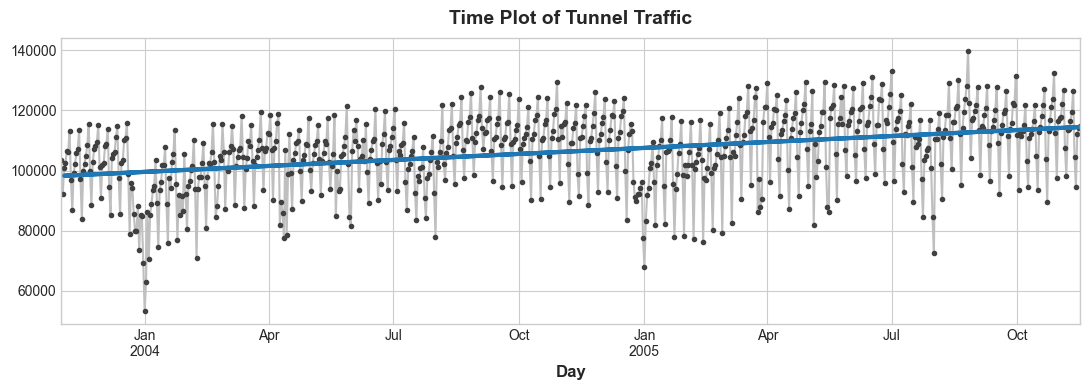

In [70]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')
plt.show()

### Lag

In [72]:
tunnels['Lag_1'] = tunnels['NumVehicles'].shift(1)
tunnels.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [73]:
# Features
X = tunnels.loc[:, ['Lag_1']]

In [75]:
X.dropna(inplace=True)
y, X = y.align(X, join='inner')

In [78]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [79]:
model = LinearRegression()

In [80]:
model.fit(train_X, train_y)

LinearRegression()

In [81]:
y_pred = pd.Series(model.predict(test_X), index=test_X.index)

In [84]:
mean_absolute_error(test_y, y_pred)

9176.034999156065

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

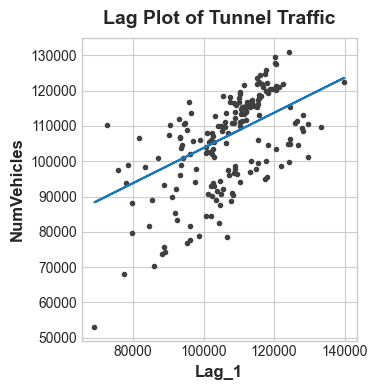

In [86]:
fig, ax = plt.subplots()
ax.plot(test_X['Lag_1'], test_y, '.', color='0.25')
ax.plot(test_X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

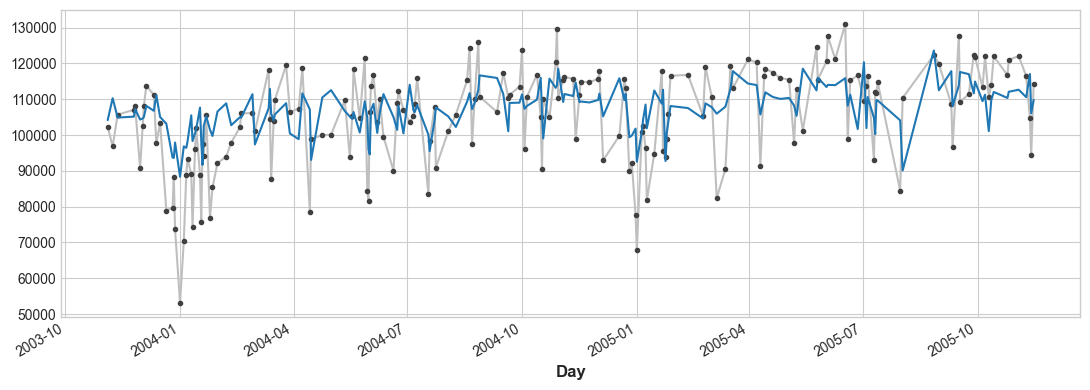

In [88]:
ax = test_y.plot(**plot_params)
ax = y_pred.plot()

## EDA

Two types of Time-step features which are unique to time series

    -Time dummy: 
    -lag features

In [ ]:
train.describe().T.style.background_gradient(cmap= 'cividis')

,count,mean,std,min,25%,50%,75%,max
id,3000888.000000,1500443.500000,866281.891642,0.000000,750221.750000,1500443.500000,2250665.250000,3000887.000000
store_nbr,3000888.000000,27.500000,15.585787,1.000000,14.000000,27.500000,41.000000,54.000000
sales,3000888.000000,357.775749,1101.997721,0.000000,0.000000,11.000000,195.847250,124717.000000
onpromotion,3000888.000000,2.602770,12.218882,0.000000,0.000000,0.000000,0.000000,741.000000
